 Author = Uluç Furkan Vardar
 
 Version = 3.0
 
## Using this code you can manipulate Wiki Dump Extracted data. 
### The data you will obtain;

###### Cleaning Criteria
    * Graph of All Type of the InfoBoxes Count >4
    * Graph of All Type of the InfoBoxes Count >100 
    * .txt that We are interested InfoBoxTypes (selectec manually)
    * Graph of All interested Articles Count (>intersted&100)
    



 
---
The output of the program is placed in an output folder created for that date. (EX Folder name: <2018-10-18>Outputs-InfoBoxClean/ )
The output consists .txt,.pdf files (Grapfhs data etc.).



####  Hit counter for every infoBox type.
 	file named '<2018-10-07>Interested_InfoBoxType_Count.txt'
 	(Format: ...\ninfoBoxType#hit_counter\n...)
 
###### Also, A Log file is generated and the important things about the data processing area are printed....



In [1]:
# -*- coding: utf-8 -*-
import yaml
import matplotlib.pyplot as plt
import pandas as pd

class InfoBoxType_Parse():
    def __init__(self,article_file_path,InfoBoxTypes_file_path):
        # Taking info about Articles
        self.articles_text  = open(article_file_path, "r").read() 
        # Taking info about InfoBoxes        
        self.InfoBoxTypes_text = open(InfoBoxTypes_file_path, "r") .read()
        
        self.interested_InfoBox = []
    def parse_and_clean_InfoBoxType(self):
        '''This function is parse and clear infoBoxes'''
        self.InfoBoxType = self.InfoBoxTypes_text.split('\n') 
        all_input_number = len(self.InfoBoxType)
        for i in range(0,all_input_number):
            if 'Vikipedi:Silinmeye aday sayfalar' in self.InfoBoxType[i] or \
                '{{' in self.InfoBoxType[i] or \
                '}}' in self.InfoBoxType[i] or \
                '|' in self.InfoBoxType[i] :
                self.InfoBoxType[i] = None
                continue
            if self.InfoBoxType[i].count('#') == 1:
                self.InfoBoxType[i] = (self.InfoBoxType[i][ :self.InfoBoxType[i].find('#') ]).strip(), \
                                yaml.load(str((self.InfoBoxType[i][self.InfoBoxType[i].find('#')+1 : ])).strip())
            else:
                self.InfoBoxType[i] = None   
                continue            
            try:
                if self.InfoBoxType[i][1] <= 4:
                    self.InfoBoxType[i] = None   
                    continue
                else: 
                    pass
            except Exception as e:             
                self.InfoBoxType[i] = None
                continue
        self.InfoBoxType = [x for x in self.InfoBoxType if x is not None]
        return all_input_number
        
    def draw(self,x,y,title,saving_path):
        plt.title(title)
        plt.plot(x, y)
        plt.xticks(x, x, rotation='vertical')
        fig =plt.gcf()
        fig.set_size_inches(20, 11)
        #plt.savefig(saving_path)
        plt.savefig(saving_path,format='eps', dpi=1000)
        plt.show()
        
    def print_info(self,x,y):
        pd.set_option('display.height', 1000)
        pd.set_option('display.max_rows', 500)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.width', 1000)
        df_more_than_1 = pd.DataFrame({'Info Box Type':x , 'Repetitions':y})
        print df_more_than_1.count()
        print df_more_than_1

    def draw_Repetition_of_InfoBox(self,output_path,title,min_repetition,print_row_info):
        "Can be draw min 4"
        x = []
        y = []
        for type,count in self.InfoBoxType:
            if count < min_repetition:
                continue
            x.append(type.decode('utf-8'))
            y.append(count)
        self.draw(x = x, 
                  y = y, 
                  title = title, 
                  saving_path = output_path+title)
        if print_row_info == True:
            self.print_info(x = x,
                            y = y)
        return len(x)
    def draw_Repetition_of_InfoBox_interested(self,output_path,title,print_row_info):
        x = []
        y = []
        for type,count in self.InfoBoxType:
            if type not in self.interested_InfoBox:
                continue
            x.append(type.decode('utf-8'))
            y.append(count)
        self.draw(x = x, 
                  y = y, 
                  title = title, 
                  saving_path = output_path+title)
        if print_row_info == True:
            self.print_info(x = x,
                            y = y)
        return len(x)
        
    def set_interested_InfoBox(self,interested):
        self.interested_InfoBox = interested
        
    def save_interested_InfoBox(self,output_path):
        all_number = 0
        interested_number = 0
        interested_summ = 0
        with open(output_path+'Interested_InfoBoxType_Count.txt', "ab") as myfile:
            for type,count in self.InfoBoxType:
                all_number+=count              
                if type in self.interested_InfoBox:
                    myfile.write(type+'#'+str(count)+'\n')
                    interested_number+=count
                    interested_summ+=count
        return all_number,interested_number,interested_summ




In [2]:
from datetime import date

def save_log(title, text,log_path):
    with open(log_path, "ab") as myfile:
        myfile.write(title +" ---------\n")
        myfile.write( text+"\n")
        myfile.write("--------------------------\n\n")            

import os
def create_files():
    today = date.today().strftime('<%Y-%m-%d>')
    mypath = '../'+today+'Outputs-InfoBoxClean'
    if not os.path.isdir(mypath):
        os.makedirs(mypath)
    log_path = '../'+today+'Outputs-InfoBoxClean/InfoBoxCleaner_Report.txt'
    f= open(log_path,"w")
    return mypath+'/',log_path

In [3]:
output_paths,log_path = create_files()
path_article  = '/Users/uluc/Desktop/Bitirme/Wikiparse_WorkSpace/<2018.10.-->Wiki/<2018-10-20>Outputs_Bulk/All_Article.txt'
path_infobox  = '/Users/uluc/Desktop/Bitirme/Wikiparse_WorkSpace/<2018.10.-->Wiki/<2018-10-20>Outputs_Bulk/infoBoxType_Counter.txt'


a = InfoBoxType_Parse(path_article,path_infobox)
all_infoBoxType_input_number = a.parse_and_clean_InfoBoxType()




ValueError: could not convert string to float: 

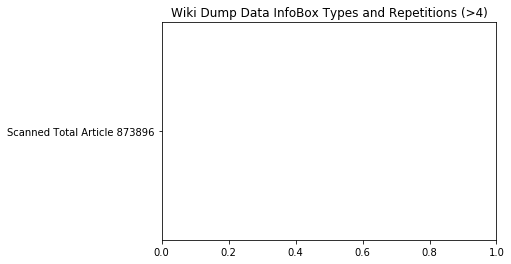

In [4]:
number_of_infobox_type_rep4 = a.draw_Repetition_of_InfoBox(output_path = output_paths,
                  title = 'Wiki Dump Data InfoBox Types and Repetitions (>4)',
                  min_repetition = 4, 
                  print_row_info = False )

In [ ]:
number_of_infobox_type_rep100  = a.draw_Repetition_of_InfoBox(output_path = output_paths,
                  title = 'Wiki Dump Data InfoBox Types and Repetitions (>100)',
                  min_repetition = 100 ,
                  print_row_info = False )

In [ ]:
infoBox_types_interested = ['Hakem','Manken','Makam sahibi','Filozof','Bilim insanı',
            'Güreşçi','Bilim adamı','Sporcu','Kurgusal karakter','Buz patencisi',
            'Asker','Voleybolcu','Sanatçı','Futbolcu','Oyuncu','Çizgi roman karakteri',
            'Müzik sanatçısı','Yazar','Kraliyet','Tenis sporcu','Profesyonel güreşçi',
            'Kişi','Basketbolcu']
a.set_interested_InfoBox(infoBox_types_interested)

In [ ]:
number_of_infobox_type_interested = a.draw_Repetition_of_InfoBox_interested(output_path = output_paths,
                  title = 'Wiki Dump Data InfoBox Types and Repetitions (>interested)',
                  print_row_info = True )


In [ ]:
all_number,interested_number,interested_summ = a.save_interested_InfoBox(output_path = output_paths)

In [ ]:
save_log('InfoBox Analysis',
' #Summation of All Info Box Type : {}\n\n \
#Total Info Box Type : {}\n \
#Total Info Box Type (>4): {}\n \
#Total Info Box Type (>100): {}\n \
#Total Info Box Type (Out interest): {}\n \
#Summation of Interested Info Box Type : {}\n\n \
Interested Info Box Types : [{}]'.format(all_number,all_infoBoxType_input_number,number_of_infobox_type_rep4,number_of_infobox_type_rep100, \
                                       number_of_infobox_type_interested,interested_summ,' ,'.join(infoBox_types_interested)),log_path)
